# **Introduction**

In the mid-17th century, Isaac Newton and Gottfried Leibniz independently discovered calculus. These groundbreaking scientific advances unfortunately led to a bitter dispute between the two that spanned the duration of their lives.$^1$ While the origins of calculus may be disputed, its applications are not. Differentiation allows us to identify the maxima, minima and zeros for that function. The ability to do each of these things is crucial in the context of optimization and modern machine learning.

The classical way of computing the derivative of a function spans two distinct approaches: approximate, numerical methods and symbolic methods. Each of these methods suffers from its own pitfalls, including numerical instability and long computation time. These pitfalls are magnified as our functions increase in complexity.$^2$ Automatic Differentiation (AD) suffers from neither instability nor long computational time, and it computes derivatives up to machine precision. AD is easily implemented via computer code, and our package will allow the user to implement to forward mode of Automatic Differentiation in python.$^2$


# **Background**


### ***What is automatic differentiation (AD)?***


Automatic differentiation (AD) is also known as algorithmic differentiation or computational differentiation.$^3$

AD is a set of techniques for numerically evaluating derivatives (gradients) by executing a sequence of arithmetic operations and elementary functions. The derivatives can therefore be computed automatically when applying chain rules to such a sequence of operations.$^{4,5}$ There are two major modes of AD: forward and reverse.$^{3,4,5}$ 

### ***Why is AD important?***

AD and symbolic differentiation both result in more accurate computation than numerical difference estimations. However, unlike symbolic approach, AD evaluates expressions numerically at particular numeric values and does not construct symbolic expressions.$^{3}$

### ***How AD works?***

The core of AD is the chain rule from Calculus. Chain rule computes the derivative for composition of two or more functions, where the derivative of a function measures the change of the output value relative to the change in input.
For a composition of f and h, its derivative can be calculated as the following:
        $$\frac{d}{dx}[f(h(x))] = f'(h(x))h'(x)$$

With the help of a computational graph and its traces, partial derivatives relative to x and y are combinations of derivatives of elementary functions, which can be calculated analytically.
Let’s consider a simple example: $$f = xcos(y)+xy$$
In AD, its computational graph and evaluation trace for forward mode looks like the following:

### **Computational Graph:**

### **Evaluation Trace:**

| Trace   | Elementary Function      | Current Value                   | Elementary Function Derivative       | $\nabla_{x}$ Value  | $\nabla_{y}$ Value  |
| :---: | :-----------------: | :----------------------: | :----------------------------: | :-----------------:  | :-----------------: |
| $x_{1}$ | $x_{1}$                  | $x$                     | $\dot{x}_{1}$                     | $1$ | $0$ |
| $x_{2}$ | $x_{2}$                  | $y$                     | $\dot{x}_{2}$                     | $0$ | $1$ |
| $x_{3}$ | $cos(x_{2})$             | $cos(y)$                | $-sin(x_{2})\dot{x}_{2}$          | $0$ | $-sin(y)$ |
| $x_{4}$ | $x_{1}x_{2}$             | $xy$           | $\dot{x}_{1}x_{2}+x_{1}\dot{x}_{2}$      | $y$ | $x$ |
| $x_{5}$ | $x_{1}cos(x_{2})$        | $xcos(y)$       | $\dot{x}_{1}(-sin(x_{2}))+x_{1}\dot{x}_{2}$|$-sin(y)$ | $x$ |
| $x_{6}$ | $x_{3}+x_{5}$        | $cos(y)+xcos(y)$       | $\dot{x}_{3}+\dot{x}_{5}$    | $-sin(y)$ | $-sin(y)+x$ |


We found that $$\frac{d}{dx}f=-sin(y)$$ and $$\frac{d}{dy}f=sin(y)+x$$
In forward mode, the values and their derivatives are stored along the chain accumulatively.

### ***Jacobian and Vectors***

The Jacobian is the matrix of partial derivatives.
Suppose we have a function $\mathbf{y}(\mathbf{x})$ that maps $R_n$ to $R_m$, the Jacobian maxtrix of the function is then the following:
$$
\mathbf{J} = \begin{bmatrix}
\frac{\partial \mathbf{f}}{\partial x_1}  \dots  \frac{\partial \mathbf{f}}{\partial x_n}
\end{bmatrix} = \begin{bmatrix} 
\frac{\partial {f_1}}{\partial x_1}  \dots  \frac{\partial {f_1}}{\partial x_n} \\
\vdots  \ddots  \vdots\\
\frac{\partial {f_m}}{\partial x_1}  \dots  \frac{\partial {f_m}}{\partial x_n} \\
\end{bmatrix}
$$
In general, for example, we have a function $h(\mathbf{f}(\mathbf{x}))$. Suppose a vector $\mathbf{v}$ happens to be the gradient of h with respect the vector $\mathbf{f}$ as follows:
$$
\mathbf{v} = \begin{bmatrix}
\frac{\partial h}{\partial f_1}  \dots  \frac{\partial h}{\partial f_m}
\end{bmatrix} ^T
$$ To get the gradient of h with respect to $\mathbf{x}$, we multiply Jacobian matrix $\mathbf{J}$ with vector $\mathbf{v}$:
$$\mathbf{J} \cdot \mathbf{v} = \begin{bmatrix} 
\frac{\partial {f_1}}{\partial x_1}  \dots  \frac{\partial {f_m}}{\partial x_n} \\
\vdots  \ddots  \vdots\\
\frac{\partial {f_1}}{\partial x_1}  \dots  \frac{\partial {f_m}}{\partial x_n} \\
\end{bmatrix} 
\begin{bmatrix}
\frac{\partial h}{\partial y_1} \\
\vdots \\ 
\frac{\partial h}{\partial y_m}
\end{bmatrix} = \begin{bmatrix}
\frac{\partial h}{\partial x_1} \\
\vdots \\ 
\frac{\partial h}{\partial x_n}
\end{bmatrix} $$

### ***Applications of AD:***

AD has been used in many applications, including optimization (solving nonlinear equations utilizing gradients/Hessians), inverse problems/data assimilation, neural networks, etc.$^{6}$


# How to Use BitterDispute 

## Installation

You can download our package from the PyPI network using pip.

    pip install bitterdispute
    
If you would prefer to copy the repository as is, you can do so here.

    git clone https://github.com/207-of-diamonds/cs207-FinalProject.git

**Note**: *We recommend performing all tests of BitterDispute in a custom conda environment to ensure required packages remain isolated from your normal space. At the moment, BitterDispute is only available for Python 3. To create a conda environment with the necessary Python version, you can run the below command:*

    conda create --name bitterdispute python=3.7
    conda activate bitterdispute

After cloning the repository, the user should install the minimum requirements using the provided requirements.txt file. To do this, run the below command:

    pip install -r requirements.txt

## Usage

After installing BitterDispute and the necessary dependencies, you can initiate a Python session through the Terminal (Terminal command: *‘python’*) or a Jupyter Notebook session (Terminal command: *‘jupyter notebook’*).

The implementation for Forward Mode Automatic Differentiation can be imported using the below command:

    from bitterdispute.forward_mode import AD

To begin differentiating, simply type **AD()**! You can save this to a variable for future reference and updating of its outputs.

    # Initiates forward mode automatic differentiation without saving output values
    AD()

    # Initiates AD and saves output values to variable x for future reference
    x = AD()

Our package's user interface will guide you through the process by asking you to enter several values:
- The number of variables that are in your formula(s)
- Values for each variable
- The formula(s) you would like to derive, entered as a copied list or manually typed separated by commas

From there, BitterDispute will handle the rest! At the end, the object will print a statement summarizing the formula(s) used and return to output the derived value based on the inputted numbers.

There are multiple callable properties for the user to call when they need to retrieve specific information about the input formula and the derived value or formula. The package will return three outputs:
- **x.inputs**: The input values for the variables in your formula(s)
- **x.outputs**: The ultimate value(s) of the formula(s) based on the values you entered
- **x.derivatives**: The final derivative(s) of the formula(s) based on the values you entered
- **x.second_derivatives**: The final derivative(s) of the formula(s) based on the values you entered
- **x.formulas**: The formula(s) you entered as a string

Printing the object 'x' will return a string clarifying which formula was used in this AD() instance.


For a printed example of BitterDispute, please see the below example.

    >>> from bitterdispute.forward_mode import AD
    >>> x = AD()

            Welcome to Bitter Dispute! America's favorite automatically
            differentiating gameshow. Let's get started.
            
    How many variables are in your formula? Your limit is 26. >> 2
    Great, we'll use 2 variables.
    Please enter a value for variable number 1.
    y = 5
    Please enter a value for variable number 2.
    x = 8
    Thank you, we recorded these values:
    y = 5.0
    x = 8.0
    Lastly, what formula would you like to derive? Please use the variables just listed.
    sin(x)*7+4*tanh(y)
    The final derivative of formula sin(x)*7+4*tanh(y) with your chosen values is -1.0177739037365197. Thanks for playing!
    >>> x.inputs
    ['y = 5.0', 'x = 8.0']
    >>> x.val
    10.925144543414053
    >>> x.der
    -1.0177739037365197
    >>> x.formula
    'sin(x)*7+4*tanh(y)'
    >>> print(x)
    Formula(s) saved: {self.formulas},
        Value(s) used: {self.values},
        Derivatives found: {self.derivatives}
        
        
If you'd like to try 

In [1]:
from bitterdispute.forward_mode import AD
x = AD()
# Note: You'll be able to enter your own values and formulas once you've installed the package.
print(x)


        Welcome to Bitter Dispute! America's favorite automatically
        differentiating gameshow. Let's get started.
        
How many variables are in your formula(s)? The limit is 26. >> 2
Great, we'll use 2 variables.
Please enter a value for variable number 1.
y = 1
Please enter a value for variable number 2.
x = 2
Thank you, we recorded these values:
y = 1.0
x = 2.0
Lastly, what formulas would you like to derive? Please use the variables just listed.        You may enter as many formulas as you'd like as a list!
x+y
The final derivative of formula ['x+y'] with your chosen values is [2]. Thanks for playing!
Formula(s) used: ['x+y']


In [4]:
# View saved information - General Information from print()
print(x)
print("---------------------------")
# View saved information - Detailed Information from each saved parameter
print(x.inputs)
print(x.outputs)
print(x.derivatives)
print(x.second_derivatives)
print(x.formulas)

Formula(s) used: ['x+y']
---------------------------
['y = 1.0', 'x = 2.0']


AttributeError: 'AD' object has no attribute 'outputs'

**Software Organization**

*What does the directory structure look like?*

    LICENSE
    README.md
    requirements.txt
    setup.py
    __init__.py
    /bitterdispute
        forward_mode.py
        variable.py
        elementary_functions.py
        optimization_GD_LS.py
    /tests
        test_forward_mode.py
        test_variable.py
        test_elementary_functions.py
    /docs
        documentation.ipynbd
        milestone2.ipynb
        milestone1.ipynb
        BitterDispute_ADGraph.png
    /dist
        bitterdispute-0.1.tar.gz
        bitterdispute-0.1-py3-none-any.whl
    /build
        bdist.macosx-10.7-x86_64
    bitterdispute.egg-info
 
*What modules are included? What is their basic functionality?*

Within our package, */bitterdispute* contains the forward mode user-facing implementation, our variable class, mathematical elementary functions for our variable class and functions defining various optimization methods. Our forward mode module imports all necessary classes and functions to execute forward mode automatic differentiation.

*Where does your test suite live?*

Our tests live in a dedicated module to assist with robust test creation. In */tests*, we maintain around 50todo testing functions for the various .py files that comprise our BitterDispute package. We use both Travis-CI and CodeCov to monitor our commits and to ensure that keeping our tests in a separate module doesn’t prevent us from maintaining sufficient code coverage.

To run tests manually, from the repository main folder, simply run one or both of the below commands:

    pytest                        # Gathers all tests in the repository and runs simultaneously
    pytest --cov=bitterdispute    # Gathers all tests and calculates repository code coverage


**Implementation**
>*AD Class*

We have implemented the AD class, which provides the user-facing instructions for forward mode automatic differentiation. It seeks input from the user's screen and saves that in Variable class objects.

To initialize the Automatic Differentation class, the user will call AD() by itself or saved to a variable and follow the on-screen instructions.

>*Variable Class*

We have implemented the Variable class, which will take in scalar variables. Each Variable is meant to represent one scalar variable ('x') at a time, but dynamically tracks derivatives and second derivatives with respect to other Variables it interacts with in any formula.

To initialize the Variable class, the user will pass a name as stirng and value as int or float for the variable. The .name, .val, .der and .der2 attributes of the Variable class object can be called to return the name of the variable, its current value, its derivatives and second derivatives with respect to any variables it encounters after instantiation within a formulas.

In [2]:
import sys
sys.path.append('..')
from bitterdispute.variable import Variable
from bitterdispute.forward_mode import AD

In [5]:
# Examples
a = 2.0 
x = Variable('x', a)
alpha = 2.0
beta = 3.0

In [6]:
#Addition
f = alpha + x
print("Value of alpha + x: ", f.val,"; Dervative: ", f.der)
f = x + alpha
print("Value of x + alpha: ", f.val,"; Dervative: ", f.der)

Value of alpha + x:  4.0 ; Dervative:  1
Value of x + alpha:  4.0 ; Dervative:  1


In [7]:
#Subtraction
f = beta - x
print("Value of beta - x: ", f.val,"; Dervative: ", f.der)
f = x - beta
print("Value x - beta: ", f.val,"; Dervative: ", f.der)

Value of beta - x:  1.0 ; Dervative:  -1
Value x - beta:  -1.0 ; Dervative:  1


In [8]:
#Multiplication
f = alpha*x
print("Value of alpha*x: ", f.val,"; Dervative: ", f.der)
f = x*beta
print("Value x*beta: ", f.val,"; Dervative: ", f.der)

Value of alpha*x:  4.0 ; Dervative:  2.0
Value x*beta:  6.0 ; Dervative:  3.0


In [9]:
#Division
f = alpha/x
print("Value of alpha/x: ", f.val,"; Dervative: ", f.der)
f = x/beta
print("Value x/beta: ", f.val,"; Dervative: ", f.der)

Value of alpha/x:  1.0 ; Dervative:  -0.5
Value x/beta:  0.6666666666666666 ; Dervative:  0.3333333333333333


In [10]:
#Power
f = alpha**x
print("Value of alpha**x: ", f.val,"; Dervative: ", f.der)
f = x**beta
print("Value x**beta: ", f.val,"; Dervative: ", f.der)

Value of alpha**x:  4.0 ; Dervative:  2.772588722239781
Value x**beta:  8.0 ; Dervative:  12.0


>*Elementary Functions:*

We've defined a series of elementary operations on Variable objects or constant values, including trig, exponential, and log functions.

Our module relies on the numpy package to evaluate the above elementary functions. The methods in the func module define how to perform elementary operations on scalars as well as variable objects.

For example, the sin function uses numpy.sin and numpy.cos to calculate value and derivative respectively. When a scalar input is detected, it is given a null derivative (i.e. treated as a constant). Sin returns a variable object with the updated value and derivative (perhaps zero).

In [3]:
#import our modules
import bitterdispute.elementary_functions as elem
import bitterdispute.variable as var

In [14]:
#Example:
val=1
#instantiate a Variable object
x=Variable('x', val)
#test_sin
obj = elem.sin(x)
print("Value of sin(x):", obj.val)
print("Derivative of sin(x):", obj.der)

Value of sin(x): 0.8414709848078965
Derivative of sin(x): 0.5403023058681398


In [15]:
#test_cos
obj=elem.cos(x)
print("Value of cos(x):", obj.val)
print("Derivative of cos(x):", obj.der)

Value of cos(x): 0.5403023058681398
Derivative of cos(x): -0.8414709848078965


In [16]:
#test_tan
obj=elem.tan(x)
print("Value of tan(x):", obj.val)
print("Derivative of tan(x):", obj.der)

Value of tan(x): 1.557407724654902
Derivative of tan(x): 3.425518820814759


In [17]:
#test_exponential
obj=elem.exp(x)
print("Value of exp(x):", obj.val)
print("Derivative of exp(x):", obj.der)

Value of exp(x): 2.718281828459045
Derivative of exp(x): 2.718281828459045


In [18]:
#test_log
obj=elem.log(x) # this directly computes the ln(); elem.log(x,base) should allow any base to work.
print("Value of ln(x):", obj.val)
print("Derivative of ln(x):", obj.der)

Value of ln(x): 0.0
Derivative of ln(x): 1.0



What method and name attributes will your classes have?

* Methods for Variable Class

```
__add__
__radd__
__sub__
__rsub__
__mul__
__rmul__
__truediv__
__rtruediv__
__pow__
__rpow__
__neg__

``` 
What external dependencies will you rely on?


```
Numpy

Pytest

Pytest-mock

```


How will you deal with elementary functions like ***sin, sqrt, log, and exp*** (and all the others)?

> Elementary functions: 

*   sin, cos, tan
*   log (logarithm of any chosen base)
*   exp
*   arcsin, arccos, arctan 
*   sinh, cosh, tanh
*   sqrt

Our module relies on the NumPy package to evaluate the above elementary functions. The methods in the func module define how to perform elementary operations on scalars as well as variable objects.

For example, the sin function uses numpy.sin and numpy.cos to calculate value and derivative respectively. When a scalar input is detected, it is given a null derivative (i.e. treated as a constant). Sin returns a variable object with the updated value and derivative (perhaps zero).

# Optimization Methods

To motivate the importance of automatic differentiation, BitterDispute comes with several optimization functions included. A user can find the optimum point using everyone's favorite optimizations such as Newton's Method, Gradient Descent, and Backtracking Line Search.

**Goal**: Find the minimizer $x^*$ that minimizes the objective function $f(x)$, such that $\nabla f(x^*)=0$
$$x^* = argmin\ f(x)$$ 

To find a valid solution on optimization problems, we want to introduce a second-derivative method to our software package: **Newton's method** 

Recall that Taylor expansion is: 
$$f(x+h) \approx f(x) + f'(x)h$$

Here we have a nonlinear function that can be estimated using linear approximation close to x

$f'(x+h) = 0$ , that is  $f'(x) + f''(x)h = 0$, that is $h = -\frac{f'(x)}{f''(x)}$

**Algorithm in 1-Dimension:**

$$x_0 = initial\ guess$$
$$h = -\frac{f'(x)}{f''(x)}$$

$$x_{k+1}=x_{k} + h = x_{k}-\frac{f'(x)}{f''(x)}$$

**Algorithm in *N*-Dimension:**
$$x_0 = initial\ guess$$
Solve $$J_k s_k = -f(x_k)$$ where $J_k$ is the Jacobian matrix, and $(J)_{ij} = \frac{\partial f_i}{\partial x_j}$

Update $$x_{k+1}=x_{k} + s_k$$

The module of Newton's method can be used as shown below:

In [4]:
from bitterdispute.elementary_functions import *
from bitterdispute.variable import Variable
from bitterdispute.optimization_newton_quasi_newton import *
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def plot_opt(x_ls, f_=lambda x: (x-5)**2):
    x_ls = np.array(x_ls)
    y = f_(x_ls)
    x_ = np.linspace(-2, 4, 250)
    z_ = f_(x_)

    plt.plot(x_ls, y, lw=3, alpha=0.5, label="Optimization")
    plt.plot(x_, z_, lw=3, ls="--", alpha = 0.5, label="Real")
    plt.legend()
    plt.show()
def plot_result(x_ls):
    x = np.linspace(0., 2., 250)
    y = np.linspace(0., 2., 250)
    x, y = np.meshgrid(x, y)
    z = (1-x)**2 + (y-x*x)**2
    levels = np.exp(np.linspace(0., 2., 10)) - 0.9

    x_ls = np.array(x_ls)
    plt.plot(x_ls[:,0], x_ls[:,1], label="Newton Method")
    plt.contour(x, y, z, levels, colors='k', linewidths=0.75)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


def funct(values):
    var = Variable(name='x', value=values)
    f = (var-5)**2
    
    return f

def funct_vect(values):
    var1 = Variable(name='x',value=values[0])
    var2 = Variable(name='y',value=values[1])
    f = (1.-var1)**2. + (var2-var1*var1)**2.
    
    return f


The Quasi Newton's method works as the following:

Reach requirement. At iteration 230
X value:  4.9999999989315835


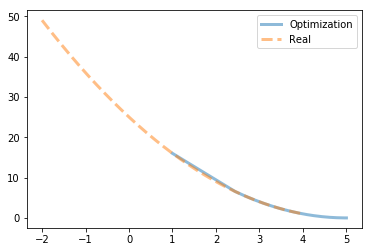

Reach max iteration!
Result: [0.99703789 0.99110145] ; f(x) =  1.7673021383155444e-05
X value:  [0.99703789 0.99110145]


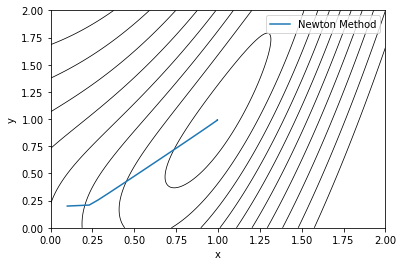

Reach requirement. At iteration 28
X value:  4.999997543564156


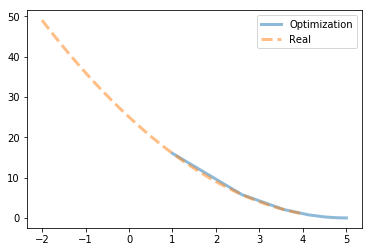

Reach requirement. At iteration 109
X value:  [0.99999359 0.99998813]


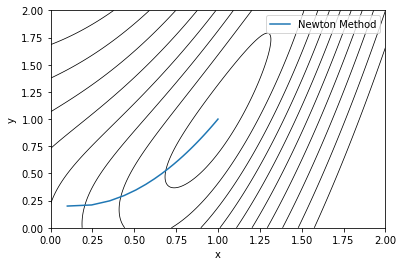

In [12]:
#=== Quasi Newton
xn, x_ls = Quasi_Newton(funct, 1, iter_max=1000)
print("X value: ", xn)

plot_opt(x_ls, f_=lambda x: (x-5)**2)


xn, x_ls = Quasi_Newton(f=funct_vect, x0=np.array([0.1, 0.2]), iter_max=100)
print("X value: ", xn)

## plot out the result
plot_result(x_ls)

##==== Newton
## run optimization on newton method
xn, x_ls = Newton(funct, 1)
print("X value: ", xn)

## plot out the result
plot_opt(x_ls, f_=lambda x: (x-5)**2)


## run optimization on newton method
xn, x_ls = Newton(funct_vect, x0=np.array([0.1, 0.2]), iter_max=1000)
print("X value: ", xn)

## plot out the result
plot_result(x_ls)




**Convergence**
- Quadratic convergence
- May fail and reach a local convergence

**Gradient Descent:** 

For gradient descent, in each iteration the step is defined by $\Delta x_k = - stepsize * \nabla f(x_k)$. 
The user can change the initial guesses, step size, max number of iterations, and tolerance.


The module can be used as shown below:
```python
>>> def f(val):
...     x1 = Variable('x',val)
...     f = (x1-5) ** 2
...    return f
>>> a = gradientDescent(f,init_val=[3],lr=0.01, max_iters=10000, tol=1e-4)

" Total iterations, 298, and the local minimum occurs at 4.99514263709298."
```


**Backtracking Line Search:** 

It is one of the line search methods used to determine the maximum amount to move along a given search direction.


Starting with a maximum candidate step size value $\alpha$>0, using search control parameters $\tau$ and $c$, the backtracking line search algorithm reduce $\alpha$ by a factor of $\tau$, in each iteration until the Armijo–Goldstein condition:  $f(x)- f(x + \alpha_i *p) \geq \alpha_i *t$, where $t=-cm$, is fulfilled

 
The module can be used as shown below:
```python
>>> def f(val):
...    x1 = Variable('x',val[0])
...    f = (x1-5) ** 2
...    return f
>>> a = backtrackingLineSearch(f, init_val=[7])
>>> b = backtrackingLineSearch(f, init_val=[5])
"Total iterations 1, the alpha, step size, is 0.1"
"Total iterations 9, the alpha, step size, is 1.0000000000000002e-17"

```




**References**

[1] Derivative. Wikipedia. Available at: https://en.wikipedia.org/wiki/Derivative#History

[2] Hoffman, Philipp H.W. “A Hitchhiker’s Guide to Automatic Differentiation.” Numerical Algorithms, 72, 24 October 2015, 775-811, Springer Link, DOI 10.1007/s11075-015-0067-6. 

[3] Automatic differentiation. Wikipedia. Available at https://en.wikipedia.org/wiki/Automatic_differentiation.

[4] Griewank, A., in Complexity in Nonlinear Optimization (ed. Pardalos, P.), World Scientific, Singapore, 1993, pp. 128–161.

[5] Coleman, T. F. and Verma, A., in Computational Differentiation: Techniques, Applications and Tools (eds Berz, M., Bischof, C., Corliss, G. and Griewank, A.), SIAM, Philadelphia, 1966, pp. 149–159.

[6] Andreas Griewank: Evaluating Derivatives. SIAM 2000.

